## edgeR-TMM normalization with Star gene counts table

https://www.bioconductor.org/packages/release/bioc/vignettes/edgeR/inst/doc/edgeRUsersGuide.pdf

In [1]:
options(stringsAsFactors = FALSE)

Load required libraries (install packages if required)

In [2]:
#Load packages
library(limma)
library(edgeR)
library(data.table)
library(RColorBrewer)
library(gplots)


Attaching package: ‘gplots’


The following object is masked from ‘package:stats’:

    lowess




### Creating DGE object for edgeR

Read in counts file `data/BNFO262_01232024_counts.csv and view head of file

In [3]:
#Read file
counts <- read.csv("./data/BNFO262_01232024_counts.csv", stringsAsFactors=F, row.names=1)
head(counts)

,CTB_1st_717,CTB_1st_722,CTB_1st_732,CTB_1st_734,CTB_1st_738,CTB_1st_750,CTB_1st_761,CTB_1st_770,CTB_1st_771,CTB_1st_772,EVT_1st_1026,EVT_1st_1087,EVT_1st_1089,EVT_1st_1094,EVT_1st_1096,EVT_1st_1097,EVT_1st_1099,EVT_1st_951,EVT_1st_970,EVT_1st_977
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
ENSG00000223972.5,1,8,3,6,3,5,2,2,8,4,0,4,5,4,3,5,2,1,6,0
ENSG00000227232.5,64,204,184,121,122,119,74,61,90,185,165,110,113,59,138,45,108,86,193,124
ENSG00000278267.1,4,13,13,2,0,3,0,3,1,6,2,14,8,2,5,7,16,5,10,5
ENSG00000243485.5,1,0,1,2,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
ENSG00000284332.1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
ENSG00000237613.2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Define groups and design and create `dge` using `DGEList()`.

In [4]:
group<-as.factor(c("CTB_1st","CTB_1st","CTB_1st","CTB_1st","CTB_1st","CTB_1st","CTB_1st","CTB_1st","CTB_1st","CTB_1st","EVT_1st","EVT_1st","EVT_1st","EVT_1st","EVT_1st",
                   "EVT_1st","EVT_1st","EVT_1st","EVT_1st","EVT_1st"))
group

design <- model.matrix(~0+group)
design

dge<- DGEList(counts=counts,group=group)

[1] CTB_1st CTB_1st CTB_1st CTB_1st CTB_1st CTB_1st CTB_1st CTB_1st CTB_1st
[10] CTB_1st EVT_1st EVT_1st EVT_1st EVT_1st EVT_1st EVT_1st EVT_1st EVT_1st
[19] EVT_1st EVT_1st
Levels: CTB_1st EVT_1st

,groupCTB_1st,groupEVT_1st
1,1,0
2,1,0
3,1,0
4,1,0
5,1,0
6,1,0
7,1,0
8,1,0
9,1,0
10,1,0


Plot library sizes

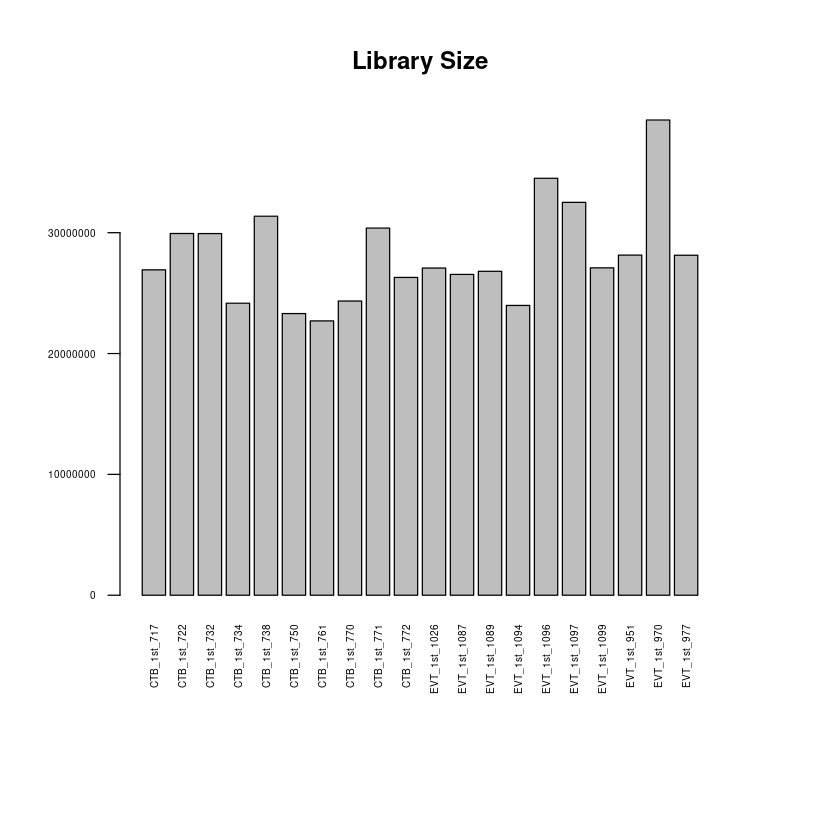

In [5]:
par(mar=c(10,5,5,5))
options(scipen=5)
barplot(dge$samples$lib.size, horiz=F, names.arg=colnames(dge$counts), las=2, cex.name = 0.5, cex.axis=.5, 
        main="Library Size")

In [6]:
#To check
class(dge)
dim(dge)
dge$samples

[1] "DGEList"
attr(,"package")
[1] "edgeR"

[1] 58278    20

,group,lib.size,norm.factors
,<fct>,<dbl>,<dbl>
CTB_1st_717,CTB_1st,26927226,1
CTB_1st_722,CTB_1st,29932635,1
CTB_1st_732,CTB_1st,29925429,1
CTB_1st_734,CTB_1st,24164359,1
CTB_1st_738,CTB_1st,31362835,1
CTB_1st_750,CTB_1st,23307473,1
CTB_1st_761,CTB_1st,22701295,1
CTB_1st_770,CTB_1st,24342939,1
CTB_1st_771,CTB_1st,30381950,1


### Filtering based on cpm cutoff

Filter genes with at least 10 cpm present in at least 3 samples

In [7]:
dim(dge)

[1] 58278    20

In [8]:
table(rowSums(dge$counts==0)==20)
keep <- rowSums(cpm(dge)>10) >= 3
dge.f <- dge[keep, , keep.lib.sizes=FALSE]
dim(dge.f)


FALSE  TRUE 
42013 16265 

[1] 10319    20

### Normalization using TMM, dispersion estimation using naive method, and DGE
“TMM (weighted trimmed mean of log expression) determines scaling factor calculated after double trimming values at the two extremes based on log-intensity ratios (M-values) and log-intensity averages (A-values)” (Dillies et al. Briefings in Bioinformatics, Vol. 14 (6): 671–683, 2013)

The calcNormFactors() function normalizes for RNA composition by finding a set of scaling factors for the library sizes that minimize the log-fold changes between the samples for most genes. The default method for computing these scale factors uses a trimmed mean of M-values (TMM) between each pair of samples. We call the product of the original library size and the scaling factor the effective library size. The effective library size replaces the original library size in all downsteam analyses.

To normalize using TMM, 
- Calculate the normalization factors (`calcNormFactors()`) using `d`
- Maximize the negative binomial conditional common likelihood to estimate a common dispersion value across all genes (`estimateCommonDisp()`)
- Compute genewise exact tests for differences in the means between two groups of negative-binomially distributed counts (`exactTest()`)

### Estimate dispersion
Estimate dispersion: The square root of the common dispersion gives the coefficient of variation of biological variation.



The first major step in the analysis of DGE data using the NB model is to estimate the dispersion parameter for each tag, a measure of the degree of inter-library variation for that tag. Estimating the common dispersion gives an idea of overall variability across the genome for this dataset.

In this example, I am renaming the variable to d1 because we can estimate dispersion by assuming everything has the same common dispersion, or we can use a generalized linear model to try to estimate the dispersion. 


Generate the estimate dispersion `d` with `estimateDisp()` using the filtered dge (`dge.f`).

In [9]:
#estimate dispersions
d <- estimateDisp(dge.f, design=design)

In [10]:
d$common.dispersion
sqrt(d$common.disp)

[1] 0.06401956

[1] 0.2530209

Here the common dispersion is found to be 0.06 and the coefficient of biological variation (BCV) is around 0.25. 

In [11]:
TMM <- calcNormFactors(d, method="TMM")
TMM <- estimateCommonDisp(TMM)
TMM <- exactTest(TMM)
dges <- table(p.adjust(TMM$table$PValue, method="BH")<0.05)
dges


FALSE  TRUE 
 2342  7977 

**This means that we have 7977 differentially expressed genes with EdgeR**

If we want to take a look at the top 10:

In [12]:
TMM.table<-data.frame(topTags(TMM, n=20))
TMM.table

,logFC,logCPM,PValue,FDR
,<dbl>,<dbl>,<dbl>,<dbl>
ENSG00000189159.15,3.233696,8.081350,1.541662e-253,1.590841e-249
ENSG00000177879.15,2.496683,6.180904,3.972250e-235,2.049482e-231
ENSG00000012232.8,3.239113,7.869874,2.667504e-217,9.175326e-214
ENSG00000097033.14,1.829348,7.102767,9.899910e-202,2.553929e-198
ENSG00000107957.16,2.782107,7.437668,1.025000e-200,2.115395e-197
ENSG00000136052.9,4.011989,5.673415,3.804768e-194,6.543568e-191
ENSG00000113719.15,2.592861,7.241257,1.058407e-186,1.560243e-183
ENSG00000136603.13,2.385722,7.421761,1.359761e-186,1.753921e-183
ENSG00000174705.12,2.605873,8.316457,2.957481e-185,3.390917e-182


In [13]:
#write these DGEs out
DGEs_05 <- topTags(TMM, n=Inf, adjust.method="BH")
keep <- DGEs_05$table$FDR <= 0.05
write.table(DGEs_05[keep,],file="./output/edgeR_TMM_p0.05.txt",sep="\t")

## Plots

### Raw and unfiltered data

First calculate cpm and log cpm using the unfiltered data (`dge`)

In [14]:
# Raw data
cpm <- cpm(dge)
lcpm <- cpm(dge, log=TRUE)

Now calculate the log cpm for the filtered data (`dge.f`)

In [15]:
# Filtered data
lcpm.f <- cpm(dge.f, log=TRUE)

Lastly calculated the TMM normalized data using `dge.f` and get the log cpm of the normalized data (`dge.norm`).

In [16]:
# TMM normalized data
dge.norm <- calcNormFactors(dge.f,method="TMM") 
dge.norm$samples$norm.factors
lcpm.norm <- cpm(dge.norm, log=TRUE)

[1] 1.2108908 1.2171912 1.2253504 1.2225409 1.2509727 1.2079808 1.2933514
 [8] 1.2897369 1.2510209 1.1883318 0.8683639 0.8587489 0.8426170 0.7958936
[15] 0.8456794 0.8542660 0.7456966 0.6260318 0.8718348 0.8219396

Warning message in brewer.pal(nsamples, "Paired"):
“n too large, allowed maximum for palette Paired is 12
Returning the palette you asked for with that many colors
”


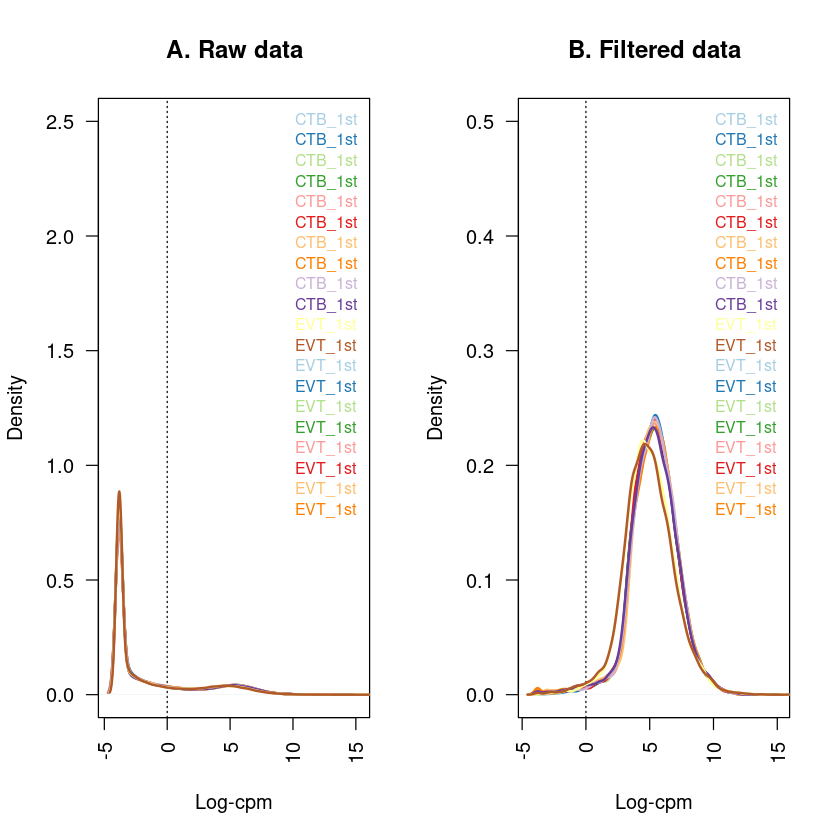

In [17]:
#set colours for graphs
nsamples <- ncol(dge)
nsamples<-(dge.f)
nsamples<-ncol(dge.norm)
col <- brewer.pal(nsamples, "Paired")

#Visualise filtered vs unfiltered data
par(mfrow=c(1,2))

#plot unfiltered data
samplenames<-c("CTB_1st","CTB_1st","CTB_1st","CTB_1st","CTB_1st","CTB_1st","CTB_1st","CTB_1st","CTB_1st","CTB_1st","EVT_1st","EVT_1st","EVT_1st","EVT_1st","EVT_1st",
                   "EVT_1st","EVT_1st","EVT_1st","EVT_1st","EVT_1st")

plot(density(lcpm[,1]),col=col(lcpm,as.factor = FALSE),lwd=1,ylim=c(0,2.5),las=2,main="",xlab="")

title(main="A. Raw data", xlab="Log-cpm")
abline(v=0, lty=3)
for (i in 2:nsamples){
  den <- density(lcpm[,i])
  lines(den$x, den$y, col=col[i], lwd=2)
}
legend("topright", samplenames, text.col=col, bty="n",cex=0.8,pt.cex=0.8)


#plot filtered data
plot(density(lcpm.f[,1]), col=col(lcpm.f,as.factor=FALSE), lwd=2, ylim=c(0,0.5), las=2,
     main="", xlab="")

title(main="B. Filtered data", xlab="Log-cpm")
abline(v=0, lty=3)
for (i in 2:nsamples){
  den <- density(lcpm.f[,i])
  lines(den$x, den$y, col=col[i], lwd=2)
}
legend("topright", samplenames, text.col=col, bty="n",cex=0.8,pt.cex=0.8)

### Boxplots of TMM-Normalized vs. unnormalized data

In [18]:
# Unnormalized data
lcpm <- cpm(dge, log=TRUE)

In [19]:
# TMM normalized data
dge.norm <- calcNormFactors(dge.f,method="TMM") 
dge.norm$samples$norm.factors
lcpm.norm <- cpm(dge.norm, log=TRUE)

[1] 1.2108908 1.2171912 1.2253504 1.2225409 1.2509727 1.2079808 1.2933514
 [8] 1.2897369 1.2510209 1.1883318 0.8683639 0.8587489 0.8426170 0.7958936
[15] 0.8456794 0.8542660 0.7456966 0.6260318 0.8718348 0.8219396

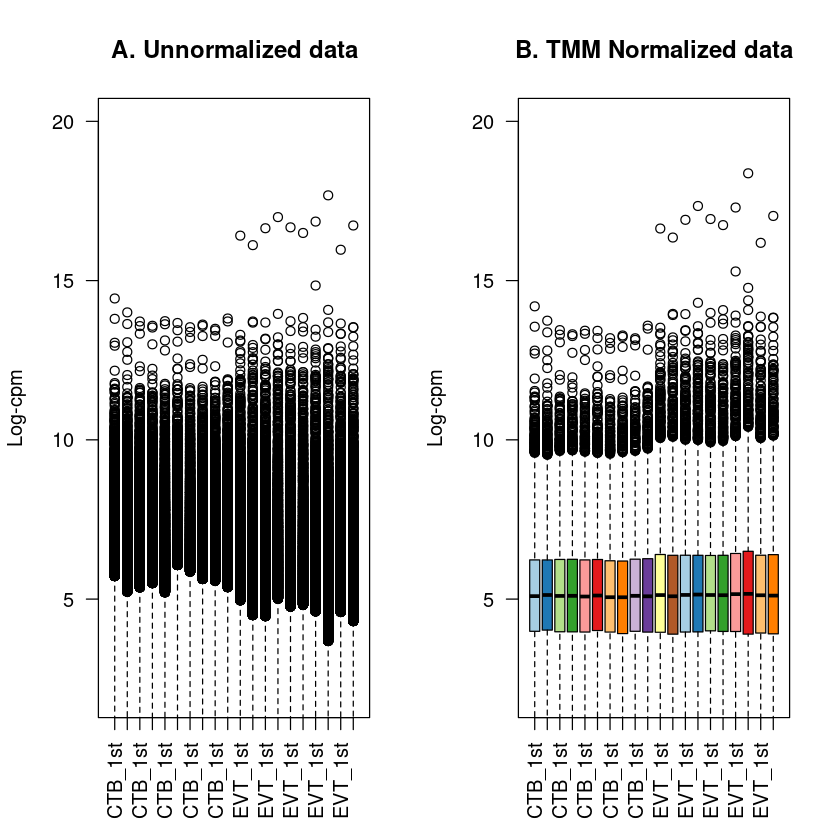

In [20]:
par(mfrow=c(1,2))

# Unnormalised data
boxplot(lcpm,las=2, col=col, main="",ylim=c(2,20),names=c("CTB_1st","CTB_1st","CTB_1st","CTB_1st","CTB_1st","CTB_1st","CTB_1st","CTB_1st","CTB_1st","CTB_1st","EVT_1st","EVT_1st","EVT_1st","EVT_1st","EVT_1st",
                   "EVT_1st","EVT_1st","EVT_1st","EVT_1st","EVT_1st"))
title(main="A. Unnormalized data",ylab="Log-cpm")

# TMM normalized data
boxplot(lcpm.norm, las=2, col=col, main="", ylim=c(2,20),
        names=c("CTB_1st","CTB_1st","CTB_1st","CTB_1st","CTB_1st","CTB_1st","CTB_1st","CTB_1st","CTB_1st","CTB_1st","EVT_1st","EVT_1st","EVT_1st","EVT_1st","EVT_1st",
                   "EVT_1st","EVT_1st","EVT_1st","EVT_1st","EVT_1st"))

title(main="B. TMM Normalized data",ylab="Log-cpm")

### PCA plot
Make a PCA plot using the log cpm normalized data (`lcpm.norm`)

Warning message in brewer.pal(nlevels(col.group), "Set1"):
“minimal value for n is 3, returning requested palette with 3 different levels
”


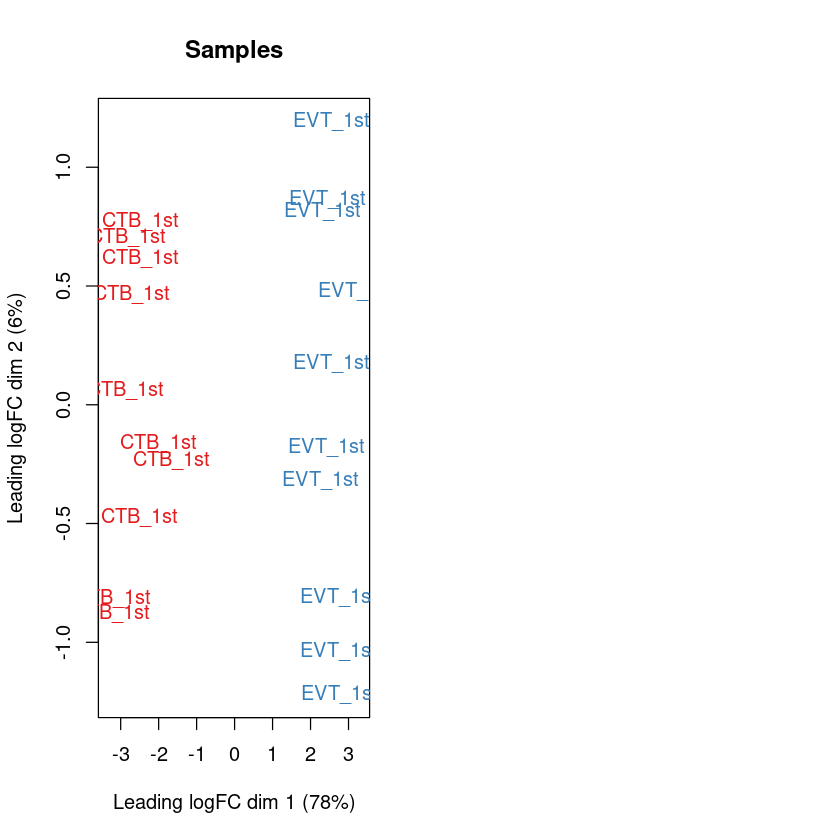

In [21]:
#MDS plot PCA
par(mfrow=c(1,2))
col.group <- group
levels(col.group) <- brewer.pal(nlevels(col.group), "Set1")
col.group <- as.character(col.group)
plotMDS(lcpm.norm, labels=group, col=col.group)
title(main="Samples")

### Heatmap of genes significantly different between groups (top 20)

<div class="alert alert-block alert-success">
    <p><b>Exercise:</b> Generate the heatmap for significantly different genes</p>
</div>

Hint: First subset the genes in the log cpm TMM-normalized data (`lcpm.norm`) using the genes in the `TMM.table`

In [22]:
# subset miRNAs from lcpm normalized data
genes<-as.list(row.names(TMM.table))
genes_lcpm.norm<-subset(lcpm.norm,rownames(lcpm.norm) %in% genes)

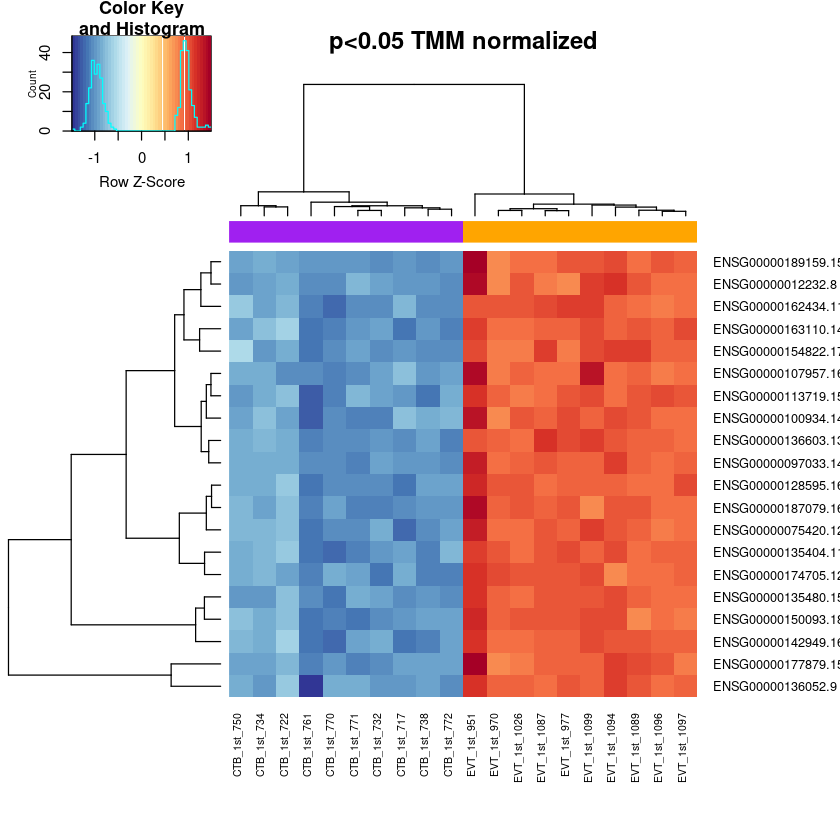

In [23]:
## Get some nicer colours
mypalette <- brewer.pal(11,"RdYlBu")
morecols <- colorRampPalette(mypalette)
# Set up colour vector for celltype variable
col.cell <- c("purple","orange")[group]

heatmap.2(genes_lcpm.norm,col=rev(morecols(50)),trace="none", main="p<0.05 TMM normalized",
          ColSideColors=col.cell,scale="row",margins=c(9,9), cexCol=0.8)


Total number of DGEs seems low so we can try with the GLM

In [24]:
y <- DGEList(counts=counts,group=group)
keep <- rowSums(y$counts) >= 10
y$counts <- y$counts[keep,]
y <- calcNormFactors(y, method="TMM")
design <- model.matrix(~0+group)
y <- estimateDisp(y,design)
fit <- glmQLFit(y,design)
qlf <- glmQLFTest(fit,coef=2)

In [25]:
dges_qlf <- table(p.adjust(TMM$table$PValue, method="BH")<0.05)
dges_qlf


FALSE  TRUE 
 2342  7977 

# Limma-voom

https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4937821/

It has been shown that for RNA-seq count data, the variance is not independent of the mean – this is true of raw counts or when transformed to log-CPM values. Methods that model counts using a Negative Binomial distribution assume a quadratic mean-variance relationship. In limma, linear modelling is carried out on the log-CPM values which are assumed to be normally distributed and the mean-variance relationship is accommodated using precision weights calculated by the voom function.

When operating on a DGEList-object, voom converts raw counts to log-CPM values by automatically extracting library sizes and normalisation factors from x itself. 

Typically, the “voom-plot” shows a decreasing trend between the means and variances resulting from a combination of technical variation in the sequencing experiment and biological variation amongst the replicate samples from different cell populations. Experiments with high biological variation usually result in flatter trends, where variance values plateau at high expression values. Experiments with low biological variation tend to result in sharp decreasing trends.

First set up the design matrix

In [26]:
#limma-voom 
#Set up design
design <- model.matrix(~0 + group)
colnames(design) <- gsub("group","", colnames(design))
design

,CTB_1st,EVT_1st
1,1,0
2,1,0
3,1,0
4,1,0
5,1,0
6,1,0
7,1,0
8,1,0
9,1,0
10,1,0


Then use [`makeContrasts()`](https://www.rdocumentation.org/packages/limma/versions/3.28.14/topics/makeContrasts) to "express contrasts between a set of parameters as a numeric matrix".

In [27]:
cm <- makeContrasts(CTBvsEVT=CTB_1st-EVT_1st,levels=design)

Apply `voom()` to remove heteroscedasticity from count data

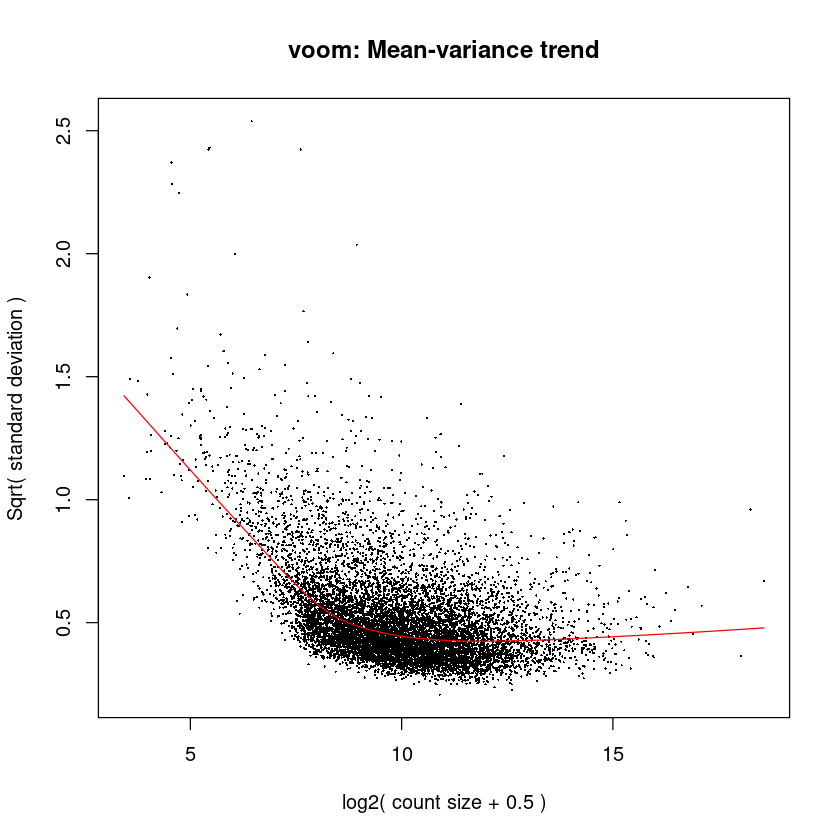

In [28]:
v <- voom(dge.norm, design, plot=TRUE)
write.csv(v$E, "./output/TMM_and_Voom_normalized_counts.csv")

Fit the linear model

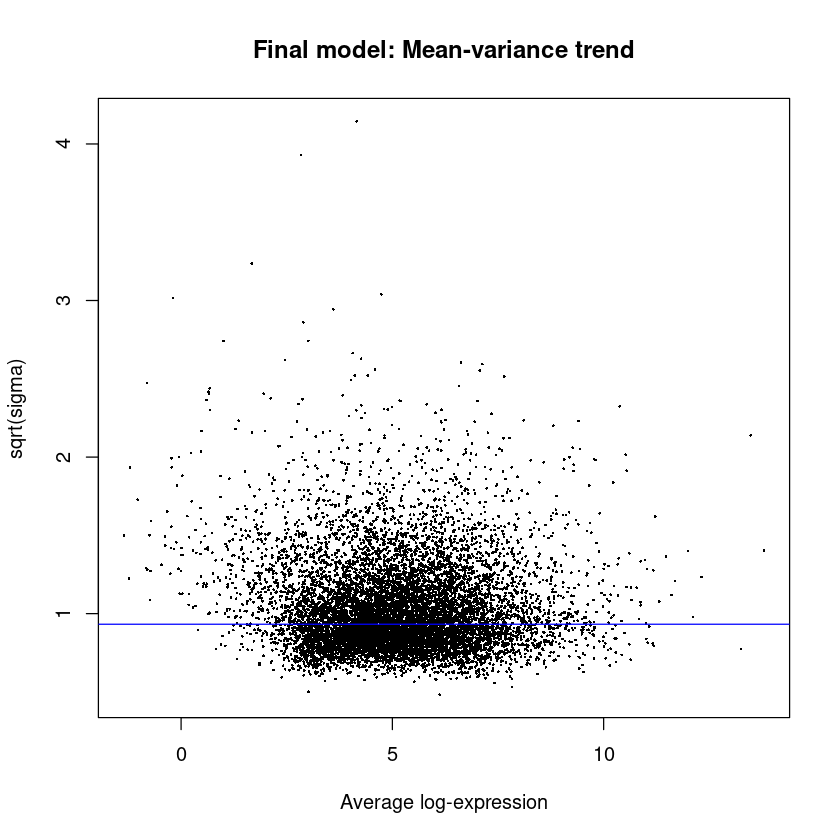

In [29]:
vfit <- lmFit(v,design)
vfit <- contrasts.fit(vfit, contrasts=cm)
efit <- eBayes(vfit)
plotSA(efit, main="Final model: Mean-variance trend")

Use `decideTests()` to determine which genes are up-regulated, down-regulated or not significantly different.

In [30]:
dt <- decideTests(efit)
summary(dt)

       CTBvsEVT
Down       3990
NotSig     2023
Up         4306

**This shows that with limma_voom we found 8296 DEGs**

### Genes with adjusted p<0.05

In [31]:
#write out p0.01 RNAs
CTB_vs_EVT<-topTreat(efit,coef=1,n=Inf)
head(CTB_vs_EVT)
ENSID<-row.names(CTB_vs_EVT)
norm<-data.frame(v$E)
merged<-merge(CTB_vs_EVT,norm,by=0,all=TRUE)
final<-subset(merged,merged$adj.P.Val<0.05)
write.table(final,file="./output/final_mRNAs_p0.05_limma.txt",sep="\t")

,logFC,AveExpr,t,P.Value,adj.P.Val,B
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ENSG00000136603.13,-2.386678,6.972056,-42.43535,5.685004e-22,5.866355e-18,40.38809
ENSG00000135480.15,-2.019802,10.427804,-37.81072,6.345594e-21,2.007369e-17,38.01322
ENSG00000174705.12,-2.606732,7.787108,-37.79837,6.389022e-21,2.007369e-17,38.05721
ENSG00000183726.10,-2.142661,5.983569,-37.44307,7.781254e-21,2.007369e-17,37.84415
ENSG00000136261.14,-1.736688,8.860098,-36.64818,1.217542e-20,2.512764e-17,37.42020
ENSG00000198087.7,1.721137,6.787513,35.90454,1.866903e-20,3.210763e-17,37.00557


### Heatmap with genes with p<0.05

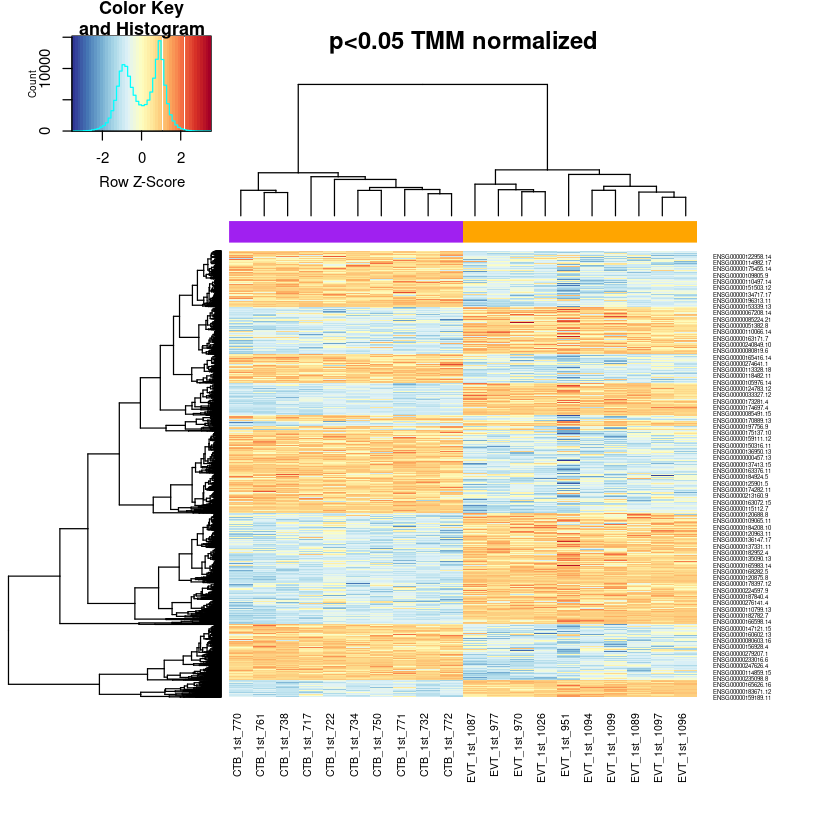

In [32]:
#heatmap
#subset miRNAs from lcpm normalized data
mRNAs<-as.list(final$Row.names)
lcpm.norm.heatmap<-as.matrix(subset(norm,rownames(norm) %in% mRNAs))

## Get some nicer colours
mypalette <- brewer.pal(11,"RdYlBu")
morecols <- colorRampPalette(mypalette)
# Set up colour vector for celltype variable
col.cell <- c("purple","orange")[group]
heatmap.2(lcpm.norm.heatmap,col=rev(morecols(50)),trace="none", main="p<0.05 TMM normalized",
          ColSideColors=col.cell,scale="row",margins=c(9,9), cexCol=0.8)

In [33]:
star_salmon_degs_EdgeR_limma <- read.csv("./data/DEGs_salmon_star_edgeR_limma.csv", header=TRUE)
star_salmon_degs_EdgeR_limma <- data.frame(star_salmon_degs_EdgeR_limma)
star_salmon_degs_EdgeR_limma

Samples_per_group,Salmon,Star,EdgeR,Limma.Voom
<int>,<int>,<int>,<int>,<int>
10,15215,16307,7977,8296
8,13847,14986,NA,NA
6,12126,13154,NA,NA
4,8309,9120,NA,NA
3,7277,8061,NA,NA
